In [44]:
#step 1 : collecting data
import pandas as pd
import numpy as np
import seaborn as sns #for statistical plotting
import matplotlib.pyplot as plt
import math
%matplotlib inline
data=pd.read_csv('iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
print("number of samples",str(len(data.index)))

number of samples 150


In [51]:
'''Step :Preparing dataset '''
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
###creating train and test data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_train
0,1,5.1,3.5,1.4,0.2,setosa,True
1,2,4.9,3.0,1.4,0.2,setosa,False
2,3,4.7,3.2,1.3,0.2,setosa,True
3,4,4.6,3.1,1.5,0.2,setosa,False
4,5,5.0,3.6,1.4,0.2,setosa,False


In [52]:
df= pd.DataFrame(data)

In [53]:
df.loc[df["Species"] == "Iris-setosa", "Species"] = "setosa"
df.loc[df["Species"] == "Iris-virginica", "Species"] = "virginica"
df.loc[df["Species"] == "Iris-versicolor", "Species"] = "versicolor"

In [54]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_train
0,1,5.1,3.5,1.4,0.2,setosa,True
1,2,4.9,3.0,1.4,0.2,setosa,False
2,3,4.7,3.2,1.3,0.2,setosa,True
3,4,4.6,3.1,1.5,0.2,setosa,False
4,5,5.0,3.6,1.4,0.2,setosa,False


In [58]:
#nnow dropping the unnecessary column
df.drop(['Id'],axis=1,inplace=True)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,False
4,5.0,3.6,1.4,0.2,setosa,False


In [59]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [60]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))


Number of observations in the training data: 117
Number of observations in the test data: 33


In [61]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
print("features",features)

features Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [62]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['Species'])[0]
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


In [63]:
#creating model
# Create a random forest Classifier. By convention, clf means 'Classifier'
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

C:\Users\klikh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [65]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.7, 0.3]])

In [66]:
# mapiing names for the plants for each predicted plant class
from sklearn.datasets import load_iris
iris = load_iris()
preds = iris.target_names[clf.predict(test[features])]

In [67]:
# View the PREDICTED species for the first five observations
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [77]:
# View the ACTUAL species for the first five observations
y_test=test['Species']
print('actual values:\n',actual)

actual values:
 1     setosa
3     setosa
4     setosa
19    setosa
20    setosa
Name: Species, dtype: object


In [78]:
# Create confusion matrix
vall=pd.crosstab(test['Species'], preds, rownames=['Actual Species'], colnames=['Predicted Species']) ##pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
vall

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,8,0,0
versicolor,0,14,1
virginica,0,2,8


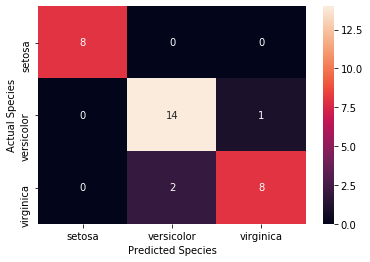

In [79]:
sns.heatmap(vall, annot=True)
plt.show()


In [80]:
print(preds.shape)
print(y_test.shape)

(33,)
(33,)


In [81]:
from sklearn.metrics import classification_report
classification_report(y_test,preds)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00         8\n  versicolor       0.88      0.93      0.90        15\n   virginica       0.89      0.80      0.84        10\n\n    accuracy                           0.91        33\n   macro avg       0.92      0.91      0.92        33\nweighted avg       0.91      0.91      0.91        33\n'

In [82]:
#check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.9090909090909091